# **Objective of the Tutorial**
In this tutorial, you will discover how to use moving average smoothing for time series forecasting with Python.

After completing this tutorial, you will know:


*   How moving average smoothing works and some expectations of your data before you can use it.
*   How to use moving average smoothing for data preparation and feature engineering.
*   How to use moving average smoothing to make predictions.











# **Packages**

First, let's run the cell below to import all the packages that you will need during this assignment.


*   numpy is the fundamental package for scientific computing with Python.
*   matplotlib is a famous library to plot graphs in Python.
*   pandas






In [0]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import mean
%matplotlib inline

# **Data Loading**

In [0]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)

# **Data Visualization**

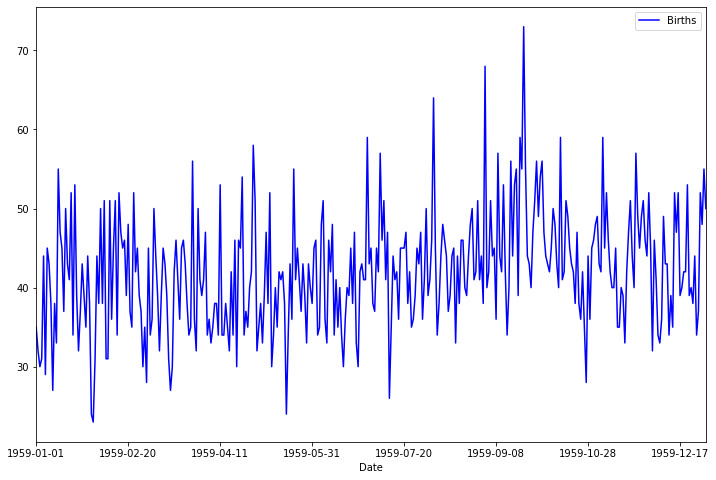

In [7]:
series.head(10)
series.plot(color='b', legend=True, figsize=(12,8))

# **Smoothing Methods (Deterministic Models)**

*   Simple Smoothing.
*   Exponential Smoothing.

# **Simple Smoothing Techniques**

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

**Simple Moving Average Method**

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a simple moving average with a window size of 3 would be calculated as:

```
# SMA(t) = mean(obs(t-2), obs(t-1), obs(t))
```




In [0]:
def SMA(ts, width): #time et window size
  '''
  Compute the simple moving average of ts

    Arguments:
    ts -- the time series which is a pandas dataframe.
    width -- the moving window size
    Return:
    ts_SMA -- SMA(ts)
  '''
  ts_rolling = ts.rolling(window=width)
  ts_SMA = ts_rolling.mean()
  return ts_SMA #moyenne

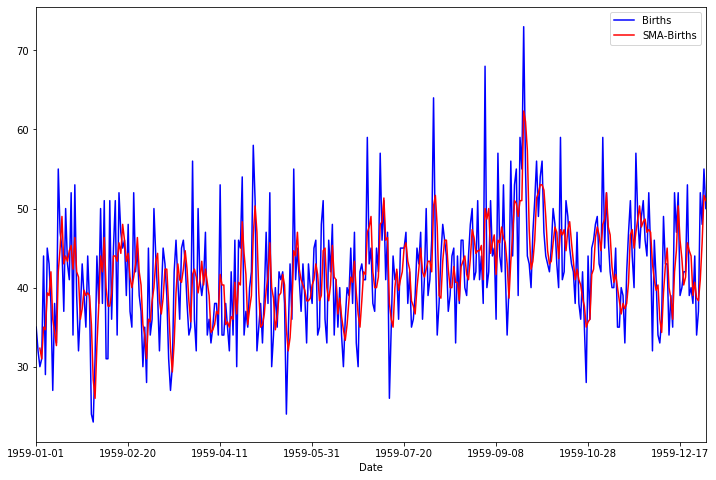

In [20]:
series_SMA = SMA(series, width=3) 
series_SMA.head(10)
X = pd.concat([series, series_SMA], axis=1, sort=False)
X.columns = ['Births', 'SMA-Births'] #SMA birth est la serie lisser 
#X.head()
# plot the original and transformed time series
X['Births'].plot(color='b', legend=True, figsize=(12,8))
X['SMA-Births'].plot(color='r', legend=True, figsize=(12,8))

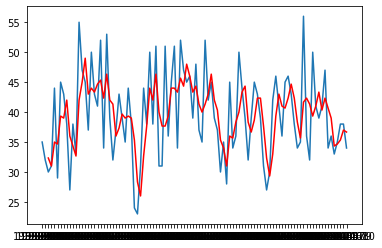

In [14]:
# plot the first 100 observations of the original and transformed time series
plt.plot(series.iloc[0:100,:]) #on visualise une partie de la serie temporelle le premier et les lignes et le deuxieme et les colennes on a une seule colone 
plt.plot(series_SMA.iloc[0:100,:], color='red')
plt.show() 

In [15]:
print(X.iloc[0:100,0:1])

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-04-06      33
1959-04-07      35
1959-04-08      38
1959-04-09      38
1959-04-10      34

[100 rows x 1 columns]


Variate the width of the moving window. What do you notice?

# **Time series forecasting**

**Data Preparation**

In [0]:
# Data Splitting
X = series.values
X_train = X[:250] 
X_test = X[250:]
print('The size of the dataset: ' + str(X.shape[0]))
print('The size of the training set: ' + str(X_train.shape[0]))
print('The size of the testing set: ' + str(X_test.shape[0]))

**Data Prediction**

In [0]:
def predict(X_train, X_test, width):
  predictions = []
  history = list(X_train)
  for t in range(len(X_test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-width, length)])
    obs = X_test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f-----expected=%f' %(yhat, obs))
  return predictions

predictions = predict(X_train, X_test, width=3)
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)


In [0]:
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

**Centered Moving Average Method**

The value at time (t) is calculated as the average of raw observations at, before, and after time (t).

For example, a center moving average with a window size of 3 would be calculated as:


```
# CMA(t) = mean(obs(t-1), obs(t), obs(t+1))
```



# **Exponential Smoothing**

**Data Collection**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',parse_dates=True)
#df.index.freq = 'MS'

**Data visualization**

In [0]:
print(df.head())
df.plot(color='b', legend=True, figsize=(12,8))

**Data Splitting**

In [0]:
X_train = df.iloc[:108]
X_test = df.iloc[108:]
print('The size of the training data: '+ str(len(X_train)))
print('The size of the testing data: '+ str(len(X_test)))
X_train['Passengers'].plot(legend=True,label='TRAIN')
X_test['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

**Data decomposition**

From the above plot, it is clearly visible that the Airline passengers data has upward trend and seasonility(approx 12 Months). We can also get the Seasonality and Trend using seasonal_decompose module in Python.


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(X_train['Passengers']).plot();

**Simple Expoential Smoothing**

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [0]:
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

In [0]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Prepare data
data = X_train['Passengers']
# Create class
model = SimpleExpSmoothing(data)
# Fit model
fit1 = model.fit(smoothing_level=0.01,optimized=False)
fit2 = model.fit(smoothing_level=0.2,optimized=False)
fit3 = model.fit(optimized=True, use_brute=True)

# Make predictions
#yhat = model_fit.predict(len(data), len(data))
fcast1 = fit1.forecast(36).rename(r'$\alpha=0.01$')
fcast2 = fit2.forecast(36).rename(r'$\alpha=0.2$')
fcast3 = fit3.forecast(36).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# Plot the results
ax = data.plot(color='black', legend=True, figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', legend=True)

In [0]:
# Access all the model parameters
fit3.model.params

In [0]:
# Access the used model parameters
fit3.params_formatted

In [0]:
# the model training error (sum square error)
fit3.sse

In [0]:
# the estimated values
fit3.fittedvalues

In [0]:
# the forecasted values
fit3.fcastvalues
# or
fcast3.head()

**Model evaluation**

In [0]:
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_true = X_train.values, y_pred = fit3.fittedvalues.values)
MSE_test = mean_squared_error(y_true = X_test.values, y_pred = fcast3.values)
print('The training MSE error of this model is: %.3f' %MSE_train)
print('The testing MSE error of this model is: %.3f' %MSE_test)


In [0]:
# Plot the tetsing and forecasting values
plt.plot(X_test, color='b')
plt.plot(fcast3, color='r')
plt.show()

In [0]:
# Summarize the fitted Model
fit3.summary()

The SimpleExponentialModel does not consider the trend and seasonality. It will just take the weighted average of past data and forecast that average for all testing data. That’s why you can observe a straight line as the prediction.


**References**

https://www.statsmodels.org/dev/generated/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit